# Линейные модели

## Классификация

### Загружаем данные

In [1]:
import pandas as pd # Pandas позволит нам удобно хранить данные в DataFrame
import seaborn as sns 
from matplotlib import pyplot as plt # Оба этих пакета помогут визуализировать данные
import numpy as np # Иногда удобнее использовать массивы numpy
import scipy.optimize as opt  # С помощью этого пакета будем искать минимум
import math # Куда же без математики?:)

In [2]:
data = pd.read_csv('Cats_and_lemurs.csv')

In [4]:
# Посмотрите на данные. Какие признаки у них есть? Сколько объектов в выборке?

### Визуализация

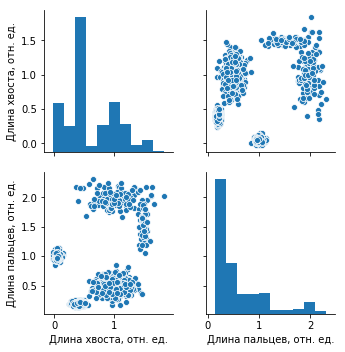

In [5]:
#Изучите графики, которые получатся после выполнения этой ячейки. Когда такую функцию может бытть использовать не удобно?
sns.pairplot(data)

Text(0.5, 0, 'Длина пальцев, отн. ед.')

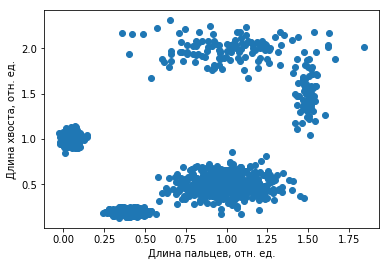

In [6]:
plt.plot(data['Длина хвоста, отн. ед.'], data['Длина пальцев, отн. ед.'],'o')
plt.ylabel('Длина хвоста, отн. ед.')
plt.xlabel('Длина пальцев, отн. ед.')

Открою секрет - первые 1000 записей - лемуры, а оставшиеся 900 - кошки. Это сделано для простоты. В реальных размеченных данных как правило есть ещё один столбец, в котором отмечено к какому классу какой объект относится.

Так что давайте отобразим их разными цветами.

Text(0.5, 0, 'Длина пальцев, отн. ед.')

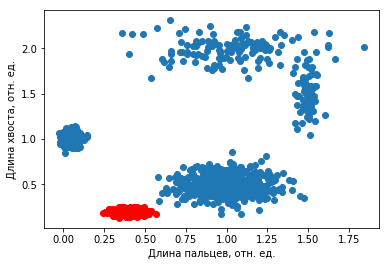

In [7]:
plt.plot(data['Длина хвоста, отн. ед.'][:1000], data['Длина пальцев, отн. ед.'][:1000],'o')
plt.plot(data['Длина хвоста, отн. ед.'][1000:], data['Длина пальцев, отн. ед.'][1000:],'ro')
plt.ylabel('Длина хвоста, отн. ед.')
plt.xlabel('Длина пальцев, отн. ед.')

### Попробуем разделить кошек и лемуров

In [8]:
# Для удобства преобразуем наши данные к массиву numpy
npdata = np.array(data)

In [9]:
# Выделите один объект на свой вкус. Запишите его в переменную obj. Выведите.

Теперь объект - это два числа. Давайте что-то сделаем с ними, чтобы узнать лемур это или кошка.
Например, давайте к лемурам относить тех, у кого хвост больше 0.5 относительных единиц

In [13]:
# Напишите функцию, которая принимает на вход объект, а на выходе возвращает 1, если хвост больше 0.5 и -1, если нет.
# def is_lemur(obj):
    

In [10]:
# Опробуйте функцию на своём объекте. Получилось?

Понятно, что это очень универсальный способ. К тому же мы используем всего один признак, когда у нас их целых два. Если бы мы добавили ещё несколько условий, позволяющих учесть второй признак - мы бы получили решающее дерево. Но о них в другом занятии. 

Вместо того, чтобы плодить условия, давайте как-нибудь преобразуем наши числа. Например, умножим их на какие-то коэффициенты. И ещё прибавим что-нибудь. Какие именно коэффициенты? Разберёмся позже

In [12]:
# Напишите функцию, которая принимает на вход массив из трёх чисел w и объект, а на выходе выдаёт сумму w0*x0+w1*x1+w2
# def product(w, x):

Отлично. Теперь мы умеем преобразовывать объект в число. Но нам-то нужно решить будет ли он лемуром или кошкой. Самое простое, что приходит в голову - давайте просто будем говорить, что все "положительные" объекты - лемуры, а остальные - кошки.

In [14]:
# Напишите функцию, которая принимает на вход массив из трёх чисел w и объект, 
# а на выходе выдаёт 1 или -1 в зависимости от знака суммы.
# def predict(w, x):

Геометрический смысл такой конструкции состоит в том, что на плоскости признаков проводится прямая, разделяющая объекты. По одну сторону от неё объекты относятся к одному классу, по другую - к другому.

Давайте по числам w ещё и строить эту прямую.

In [15]:
#Исправьте эту функцию так, чтобы она корректно работала при w[1] = 0
def graph(w):
    plt.plot(data['Длина хвоста, отн. ед.'][:1000], data['Длина пальцев, отн. ед.'][:1000],'o')
    plt.plot(data['Длина хвоста, отн. ед.'][1000:], data['Длина пальцев, отн. ед.'][1000:],'ro')
    nw = np.array(w)
    nw = nw/math.sqrt(sum(nw**2))
    k = -nw[0]/nw[1]
    m = -nw[2]/nw[1]
    x = np.array([0,1])
    y = x*k + m
    plt.plot(x, y)
    plt.ylabel('Длина хвоста, отн. ед.')
    plt.xlabel('Длина пальцев, отн. ед.')

In [16]:
# Поэкспериментируйте с весами w (да, эти коэффициенты ещё называют весами при признаках). 
# Попробуйте подобрать их так, чтобы прямая разделяла кошек и лемуров

Отлично! Эти веса w вместе с функцией predict и есть наша линейная модель. Очень просто. Теперь нам осталось её обучить: найти такие веса, чтобы модель хорошо угадывала ответы на наших данных.

Для этого нужно объяснить компьютеру, какая модель для нас хорошая, а какая - плохая. Давайте будем оценивать качество модели по тому, сколько объектов она правильно угадает.

In [17]:
# Напишите функцию, которая на вход будет принимать веса w, 
# а на выходе будет выдавать долю правильных ответов модели с такими весами на наших данных.
def accuracy(w):
    score = 0
    # Ваш код
    return score/1900

In [18]:
# Чему равна доля правльных ответов для подобранных вами коэффициентов?

Чем больше доля правильных ответов - тем лучше. Но так исторически сложилось, что у функций ищут не максимум, а минимум. Поэтому определим новую функцию, которая будет выдавать ту же долю неправильных ответов, но с другим знаком

In [21]:
def minac(w):
    return -accuracy(w)

In [22]:
ans = opt.minimize(minac, [0, 0, -0.65],  method = 'powell')

In [24]:
# Постройте график с найденными весами

## Регрессия

### Загружаем данные

In [25]:
data_regr = pd.read_csv('weights_heights.csv', index_col = 'Index')

Посмотрите первые несколько записей. Самостоятельно постройте pairplot.

In [27]:
# Ваш код

Теперь попробуем научиться предсказывать рост человека по его весу. В этом случае линейная модель будет соответствовать обычной прямой. Т.е. теперь будет всего два коэффициента.

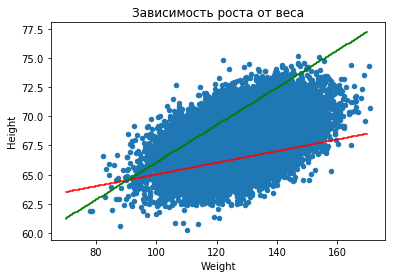

In [28]:
# Поэкспериментируйте с весами. Можно ли на глаз построить хорошую регрессию?
data_regr.plot(x = 'Weight',y = 'Height', kind = 'scatter',title = u'Зависимость роста от веса')
x1 = np.linspace(70,170,200)
y1 = 60 + 0.05*x1
y2 = 50 + 0.16*x1
plt.step(x1,y1, color = 'red')
plt.step(x1,y2, color = 'green')
plt.show()

### Определяем функцию ошибки 

In [29]:
# Напишите сами функцию, которая бы по заданному массиву весов w 
# выдавала сумму квадратов отклонений предсказаний от истинных ответов.
y = data_regr['Height']
x = data_regr['Weight']
def error(w):
    ans = 0
    # Ваш код
    return ans

 Опробуйте функцию на весах, которые вы подбирали раньше
 Удобно ли интерпретировать результат её работы?
 Как, не модифицируя функцию, что-то понять по ответу?
 *Как модифициовать функцию, чтобы ответ было легко интерпретировать? 

In [33]:
# Напишите функцию, которая будет выдавать сумму квадратов отклонений на весах 50, w1
# def er50(w1):
    

In [34]:
w1 = np.linspace(0, 0.5, 1000)
er = er50(w1)
plt.plot(w1,er)
plt.title(u'Зависимость функционала ошибки от w1')
plt.xlabel('w1')
plt.ylabel(u'Квадратичный функционал ошибки')
plt.text(0.45, 0, 'w0 = 50')
plt.show()

NameError: name 'er50' is not defined

In [160]:
# Найдём минимум этой функции
opt_w1 = opt.minimize_scalar(er50, bracket = [-5,5])

In [161]:
# Посмотрите на результат работы минимизации. Что означают поля?
opt_w1

     fun: 79512.2172869951
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728833175

In [35]:
# Постройте график с найденным w1

In [36]:
# Теперь минимизируем по обоим параметрам. Вставьте удачные на ваш взгляд
# начальные веса и границы изменения параметров
# opt_w = opt.minimize(error, (Начальные веса) ,method = 'L-BFGS-B', bounds = ((Границы для w0),(Границы для w1)))

In [37]:
# Посмотрите что получилось и постройabsте график

## Язык линейной алгебры

В общем-то ничего не изменится. Только теперь мы будем называть (одномерные) массивы чисел - векторами. А вместо сумм записывать скалярные произведения. Все просто.

Перепишем функции ошибок для задач классификации и регрессии. Для этого нам придётся добавить к нашим данным константный признак.

In [182]:
# Добавим к объектам в npdata ещё один признак, равный на всех объектах 1.
# Запишем его в новую переменную, чтобы не нарушить работоспособность кода выше.
const = np.transpose([np.ones(1900)])
npdata_lin = np.hstack([npdata, const])

In [38]:
def sign(a):
    if type(a) == type(1.):
        if a > 0:
            return 1.
        return -1.

In [189]:
# Перепишем prediction для задачи классификации
def predict_lin(w,x):
    return sign(np.dot(x,w))

In [192]:
# Опробуйте prediction на нескольких объектах. Работает?

-1

Как мы уже говорили, в реальных задачах данные не отсортированны по классам. У размеченных объектов просто есть метки. Если отделить метки от данных, получится вектор правильных ответов. Давайте попробуем его использовавть

In [196]:
ans = np.ones(1900)

In [197]:
for i in range(900):
    ans[i+1000] = -1

In [198]:
ans

array([ 1.,  1.,  1., ..., -1., -1., -1.])

Напишите функцию, которая по заданному вектору весов будет давать вектор ответов.
Напишите функцию, которая будет считать accuracy по заданному вектору весов и ответов. Желательно использовать np.dot()